# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [51]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [2]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.set_default_dtype(torch.float64)
torch.__version__

'1.13.1+cu117'

In [3]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, device=device)

Create dataset

In [6]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

<module 'matplotlib.pyplot' from 'd:\\mf\\anaconda3\\envs\\paddle_pytroch\\lib\\site-packages\\matplotlib\\pyplot.py'>

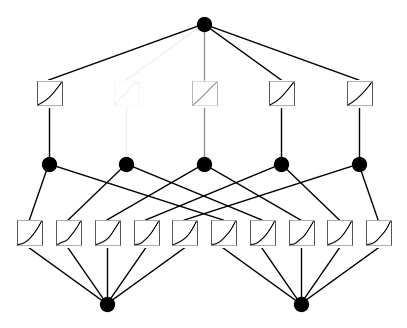

In [7]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

Train KAN with sparsity regularization

In [9]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10., device=device)

train loss: 0.13 | test loss: 0.12 | reg: 19.14 : 100%|█████████████| 20/20 [00:20<00:00,  1.04s/it]


Plot trained KAN

<module 'matplotlib.pyplot' from 'd:\\mf\\anaconda3\\envs\\paddle_pytroch\\lib\\site-packages\\matplotlib\\pyplot.py'>

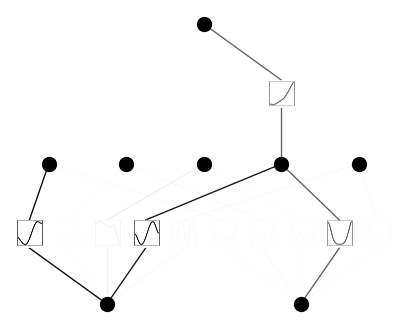

In [10]:
model.plot()

Prune KAN and replot (keep the original shape)

<module 'matplotlib.pyplot' from 'd:\\mf\\anaconda3\\envs\\paddle_pytroch\\lib\\site-packages\\matplotlib\\pyplot.py'>

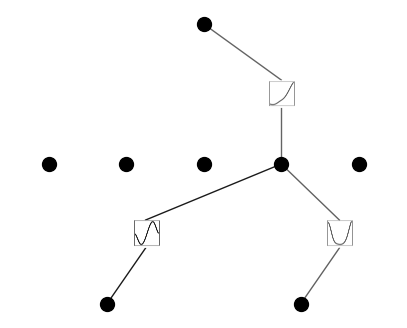

In [11]:
model.prune()
model.plot(mask=True)

Prune KAN and replot (get a smaller shape)

<module 'matplotlib.pyplot' from 'd:\\mf\\anaconda3\\envs\\paddle_pytroch\\lib\\site-packages\\matplotlib\\pyplot.py'>

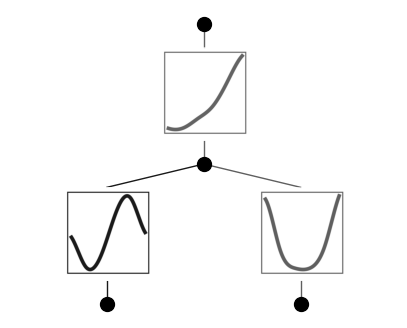

In [12]:
model = model.prune()
model(dataset['train_input'])
model.plot()

Continue training and replot

In [14]:
model.train(dataset, opt="LBFGS", steps=50, device=device)

train loss: 0.00 | test loss: 0.00 | reg: 2.86 : 100%|██████████████| 50/50 [00:30<00:00,  1.63it/s]


{'train_loss': [array(0.04771317),
  array(0.02047056),
  array(0.01582519),
  array(0.01361912),
  array(0.01078602),
  array(0.00635057),
  array(0.00564354),
  array(0.00528025),
  array(0.00511924),
  array(0.00495509),
  array(0.00489862),
  array(0.00481141),
  array(0.00476628),
  array(0.00474617),
  array(0.00473569),
  array(0.00471799),
  array(0.00470536),
  array(0.00470044),
  array(0.00469812),
  array(0.00469559),
  array(0.00469228),
  array(0.00469187),
  array(0.00469148),
  array(0.00469112),
  array(0.00469099),
  array(0.00469112),
  array(0.00469087),
  array(0.00469017),
  array(0.00468926),
  array(0.0046879),
  array(0.00469446),
  array(0.00469114),
  array(0.00468656),
  array(0.0046835),
  array(0.00467981),
  array(0.00469687),
  array(0.00469314),
  array(0.00469179),
  array(0.00468983),
  array(0.00468681),
  array(0.00470611),
  array(0.00470427),
  array(0.00470138),
  array(0.0046968),
  array(0.00469265),
  array(0.00470793),
  array(0.00470418),
  

<module 'matplotlib.pyplot' from 'd:\\mf\\anaconda3\\envs\\paddle_pytroch\\lib\\site-packages\\matplotlib\\pyplot.py'>

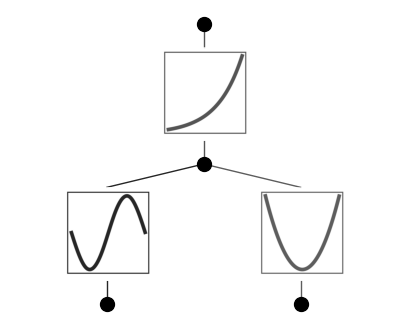

In [15]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [16]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999868432807518
fixing (0,1,0) with x^2, r2=0.9999995969983742
fixing (1,0,0) with exp, r2=0.9999990338164441


Continue training to almost machine precision

In [21]:
model.train(dataset, opt="LBFGS", steps=50, device=device)

train loss: 0.00 | test loss: 0.00 | reg: 2.85 : 100%|██████████████| 50/50 [00:03<00:00, 13.55it/s]


{'train_loss': [array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.81740947e-12),
  array(1.8

Obtain the symbolic formula

In [20]:
model.symbolic_formula()[0][0]

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))